In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_prices_df = pd.read_csv('car data.csv')

In [4]:
car_prices_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_prices_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_prices_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print(car_prices_df['Fuel_Type'].value_counts())
print(car_prices_df['Seller_Type'].value_counts())
print(car_prices_df['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
car_prices_df.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}, 'Seller_Type': {'Dealer' : 0, 'Individual':1},
                      'Transmission': {'Manual':0, 'Automatic':1}}, inplace = True)

In [10]:
print(car_prices_df['Seller_Type'].value_counts())
print(car_prices_df['Fuel_Type'].value_counts())
print(car_prices_df['Transmission'].value_counts())

0    195
1    106
Name: Seller_Type, dtype: int64
0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


In [11]:
car_prices_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X = car_prices_df.drop(columns = {'Car_Name', 'Selling_Price'}, axis = 1)
Y = car_prices_df['Selling_Price']

In [13]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


We will be building Lasso Regression model over Linear and see which one works better

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
X_train_predict = model.predict(X_train)

In [19]:
print('R sqaured of training data is:', metrics.r2_score(X_train_predict,Y_train))

R sqaured of training data is: 0.8685439505823465


Text(0.5, 0, 'Actual training model')

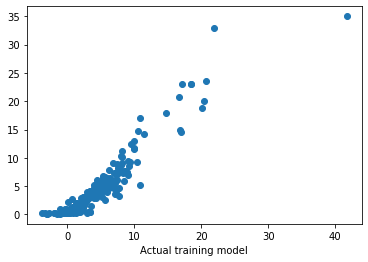

In [20]:
plt.scatter(X_train_predict, Y_train)
plt.xlabel('Predicted training model')
plt.xlabel('Actual training model')

In [21]:
X_test_predict = model.predict(X_test)

In [22]:
print('R sqaured of testing data is:', metrics.r2_score(X_test_predict,Y_test))

R sqaured of testing data is: 0.8193296211106084


Text(0.5, 0, 'Actual testing model')

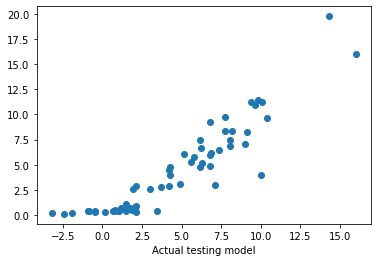

In [23]:
plt.scatter(X_test_predict, Y_test)
plt.xlabel('Predicted testing model')
plt.xlabel('Actual testing model')

Using Lasso Regression

In [24]:
model2 = Lasso()

In [25]:
model2.fit(X_train, Y_train)

Lasso()

In [26]:
X_train_predict = model2.predict(X_train)

In [27]:
print('R sqaured of training data is:', metrics.r2_score(X_train_predict,Y_train))

R sqaured of training data is: 0.7999397993548052


Text(0.5, 0, 'Actual training model')

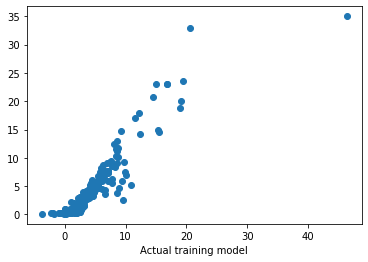

In [28]:
plt.scatter(X_train_predict, Y_train)
plt.xlabel('Predicted training model')
plt.xlabel('Actual training model')

In [29]:
X_test_predict = model2.predict(X_test)

In [30]:
print('R sqaured of testing data is:', metrics.r2_score(X_test_predict,Y_test))

R sqaured of testing data is: 0.7717678246278714


Text(0.5, 0, 'Actual testing model')

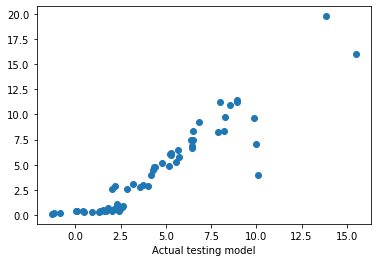

In [31]:
plt.scatter(X_test_predict, Y_test)
plt.xlabel('Predicted testing model')
plt.xlabel('Actual testing model')

In [33]:
from sklearn.model_selection import KFold
kfold = KFold(5)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y)
print(scores)
mean_score = np.mean(scores)
print(mean_score)
#mi accuracy > -95, max > 83%

[  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197]
-18.310259783211528


In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{'kernel' : ['linear']}, {'kernel' : ['gamma']}]

gridcv =GridSearchCV(params = params,scoring = 'mean_squared_error', cv = 10)
print(gridcv.best_params_)
print(gridcv.best_scores_)